<a href="https://colab.research.google.com/github/RATHISHKUMAR07/ML_Projects/blob/main/Final_Customer_Mood_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd

In [162]:
reviews = pd.read_csv("whatsapp_Data.csv")

In [163]:
reviews.head()

,reviewId,content,score,app,category
0,7ef2741f-fd7a-4eef-8ea8-5e3bc2806e9a,"Super, 😉",5,WhatsApp Messenger,communication
1,bdbb60b4-7290-4f54-8506-899e92ae1fa5,Good,1,WhatsApp Messenger,communication
2,b1965a5d-093d-4787-974a-7b9128fa10c3,Helpful,4,WhatsApp Messenger,communication
3,f6087b82-2e03-49ea-8dda-8854992565b5,Best forever,3,WhatsApp Messenger,communication
4,2eb65092-f7fb-4ef4-b18a-53941caf13b0,Good,5,WhatsApp Messenger,communication


In [164]:
len(reviews)

5000

In [165]:
cols = ['reviewId','category']
reviews = reviews.drop(cols, axis=1)
reviews.head(5)

,content,score,app
0,"Super, 😉",5,WhatsApp Messenger
1,Good,1,WhatsApp Messenger
2,Helpful,4,WhatsApp Messenger
3,Best forever,3,WhatsApp Messenger
4,Good,5,WhatsApp Messenger


In [166]:
reviews = reviews.dropna()

In [167]:
len(reviews)

4998

In [168]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4998 non-null   object
 1   score    4998 non-null   int64 
 2   app      4998 non-null   object
dtypes: int64(1), object(2)
memory usage: 156.2+ KB


In [169]:
X= (reviews['content'].values)
y = (reviews['sentiment'][0:4998].values)

In [170]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)

In [172]:
batch_size = 64
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]

In [173]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100
embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(200))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [174]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           172768    
                                                                 
 lstm_3 (LSTM)               (None, 200)               186400    
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 359,369
Trainable params: 359,369
Non-trainable params: 0
_________________________________________________________________
None


In [175]:
from keras.models import Sequential
score = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy: ",score)

40/40 - 6s - loss: 0.9489 - accuracy: 0.1136 - 6s/epoch - 150ms/step
Accuracy:  74.86


In [176]:
Check_set = reviews.content.values
Check_seq = tk.texts_to_sequences(Check_set)
Check_pad = pad_sequences(Check_seq, maxlen = 100, padding = 'post')
# Predict sentiment
check_predict = model.predict(Check_pad, verbose = 0)
# Prepare data frame
check_df = pd.DataFrame(list(zip(reviews.content.values,reviews.score.values,reviews.app.values, check_predict)), columns = ['content','score','app','sentiment'])
check_df.sentiment = ['Positive' if x == [1] else 'Negative' for x in check_df.sentiment]

In [181]:
reviews

,content,score,app,sentiment
0,"Super, 😉",5,WhatsApp Messenger,Pos
1,Good,1,WhatsApp Messenger,Pos
2,Helpful,4,WhatsApp Messenger,Pos
3,Best forever,3,WhatsApp Messenger,Pos
4,Good,5,WhatsApp Messenger,Pos
...,...,...,...,...
4994,Device Name -Letv,4,WhatsApp Messenger,NaN
4995,Best apps,5,WhatsApp Messenger,Pos
4996,hhh,5,WhatsApp Messenger,NaN
4997,Aasna,1,WhatsApp Messenger,NaN


In [182]:
count = 0
count1 = 0
count2 = 0
for i in range(len(reviews)):
    if(reviews['sentiment'][i] == 'Pos'):
        count+=1
    elif(reviews['sentiment'][i] == 'Neg'):
        count1+=1
    else:
      count2+=1

In [183]:
print(count)
print(count1)
print(count2)

2972
597
1430


In [103]:
reviews = reviews['sentiment'].astype(str)

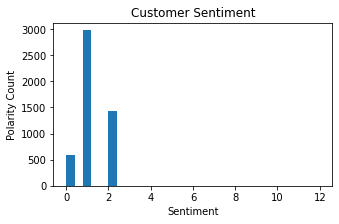

In [184]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3), sharey=True)

plt.hist(reviews_pol, bins=30)
plt.ylabel('Polarity Count')
plt.xlabel('Sentiment')
plt.title('Customer Sentiment')

plt.show()

In [185]:
pos = count
neg = count1
nan = len(reviews) - count2
per = pos/nan
print("Final Percentage of Whatsapp")

print(format(per*100,".2f"))

Final Percentage of Whatsapp
83.27


In [188]:
reviews.sentiment = reviews['sentiment'].astype(str)
reviews.score = reviews['score'].astype(str)

Text(0.5, 1.0, 'Scatter plot on Playstore Reviews')

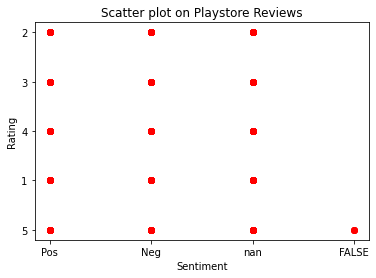

In [189]:
plt.scatter(reviews['sentiment'],reviews['score'] ,color=['r'])
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.title('Scatter plot on Playstore Reviews')

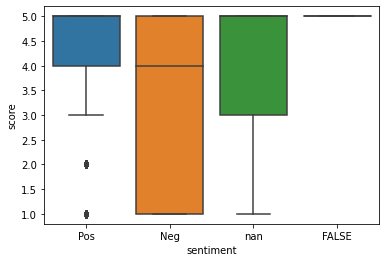

In [193]:
import seaborn as sns
sns.boxplot(x='sentiment',y='score',data = reviews)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

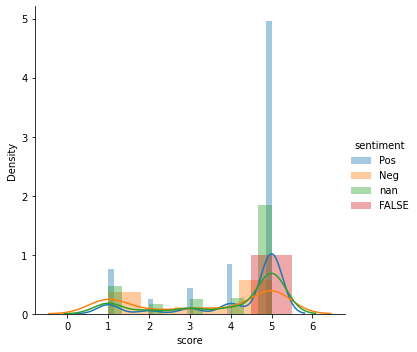

In [194]:
sns.FacetGrid(reviews,hue='sentiment',size=5).map(sns.distplot,'score').add_legend()

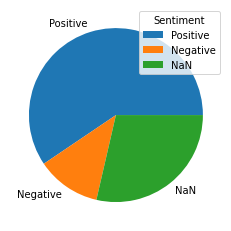

In [195]:
import numpy as np
pie = np.array([count, count1, count2])
mylabels = ["Positive", "Negative", "NaN"]

plt.pie(pie, labels = mylabels)
plt.legend(title = "Sentiment")
plt.show() 